In [27]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [28]:
df.head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1


In [29]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [31]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
df.loc[0]

Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [33]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


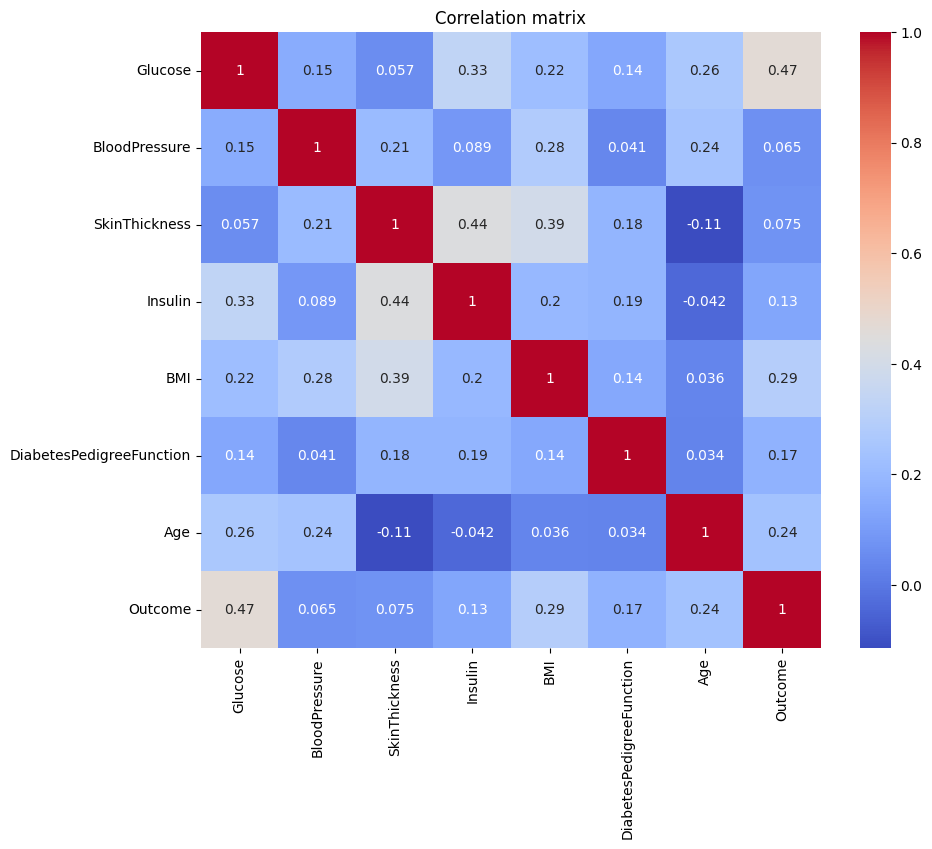

In [34]:
plt.figure(figsize=(10,8))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [35]:
df.isnull().values.any()

np.False_

In [36]:
true_count=len(df.loc[df['Outcome']==True])
false_count=len(df.loc[df['Outcome']==False])
print([true_count,false_count])

[268, 500]


In [10]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X=df[['Glucose','BloodPressure','Insulin','DiabetesPedigreeFunction','Age','BMI','SkinThickness']]
Y=df['Outcome']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [13]:
n_estimators=10
base_models=[]

In [14]:
for i in range(n_estimators):
    rf=RandomForestClassifier(n_estimators=200)
    rf.fit(X_train,Y_train)
    base_models.append(rf)

In [15]:
predictions=[model.predict(X_test) for model in base_models]


In [17]:
ensemble_predictions=np.round(np.mean(predictions,axis=0))

In [19]:
ensemble_accuracy=accuracy_score(Y_test,ensemble_predictions)

In [20]:
ensemble_accuracy

0.7748917748917749

In [21]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,ensemble_predictions)

In [22]:
confusion



array([[138,  19],
       [ 33,  41]])

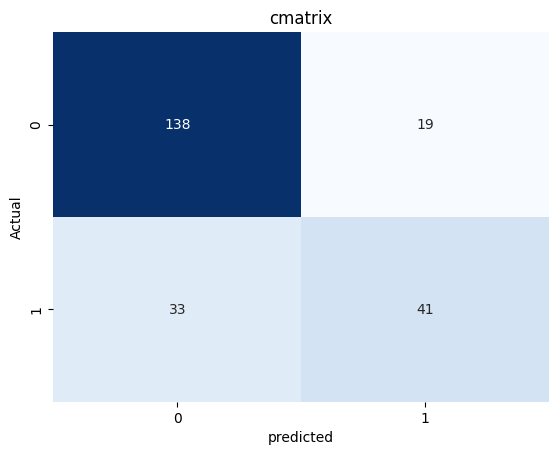

In [23]:
cn=confusion_matrix(Y_test,ensemble_predictions)
sns.heatmap(cn,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('cmatrix')
plt.show()

In [26]:

# Get input from the user
user_input = {
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: ')),
    'BMI': float(input('Enter BMI: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
     
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")

Enter Glucose level:  12
Enter Blood Pressure:  12
Enter Insulin level:  121
Enter Diabetes Pedigree Function:  12
Enter Age:  100
Enter BMI:  23
Enter Skin Thickness:  22


The model predicts: No diabetes
